# First: explore the data
### Review the unstructured csv files and answer the following questions with code that supports your conclusions:
* Are there any data quality issues present?
* Are there any fields that are challenging to understand?

## Summary of the data quality analysis
Transactions table need more clarification, understanding this table is challening.
1. This table only has 24K unique receipt ID, assumption would be that every row will have a unique transaction, 24K unique receipt ID gives a picture that the rows are unique for every products in a receipt and every receipt can have multiple products.
2. From a rewards journey perspective, scan date should always be after the purchase date but 94 records had it the other way which could be a data entry error.
3. Some receipt ID has multiple user id which needs further clarification.

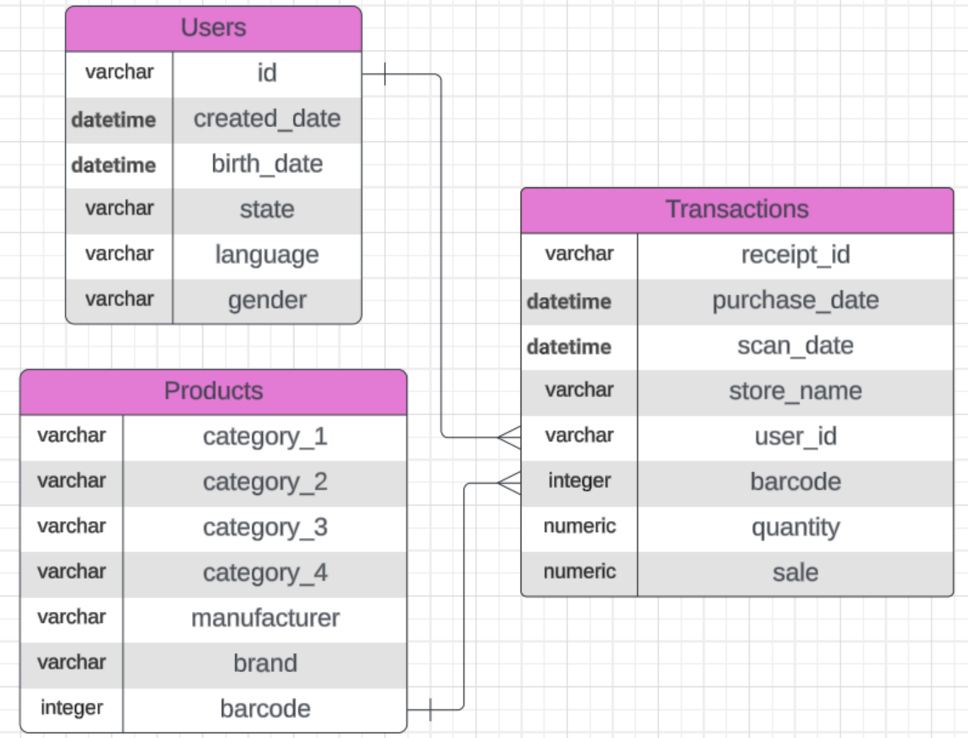

# Transaction

In [3]:
# Import necessary libraries and upload the dataset
import pandas as pd
import json
from google.colab import files
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

uploaded = files.upload()
filename = list(uploaded.keys())[0]  # Geting the file name

transaction_df = pd.read_csv(filename)
transaction_df.head()

Saving TRANSACTION_TAKEHOME.csv to TRANSACTION_TAKEHOME.csv


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [4]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


Barcode value should not have null values for every transaction

In [5]:
transaction_df.duplicated().value_counts() # 171 duplicates found

,count
False,49829
True,171


In [27]:
transaction_df['RECEIPT_ID'].nunique() # only half of the rows are unique

24440

In [6]:
transaction_df.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [8]:
import numpy as np
transaction_df['FINAL_SALE'] = transaction_df['FINAL_SALE'].replace(r'^\s*$', np.nan, regex=True)

In [9]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      37500 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


Final sale's non null value changed from 50k to 37.5k after replacing ' ' with null

In [13]:
(transaction_df['FINAL_QUANTITY'] == 'zero').sum()
# 12,500 rows have the final quantity as zero

12500

In [23]:
transaction_df['FINAL_SALE'] = transaction_df['FINAL_SALE'].astype(float)
transaction_df['FINAL_SALE'].min()

0.0

In [26]:
transaction_df['FINAL_SALE'].max()

462.82

Transaction funnel from a user journey perspective (left to right):
purchase_date >> scan_date

In [ ]:
transaction_df['PURCHASE_DATE'] = pd.to_datetime(transaction_df['PURCHASE_DATE'], errors='coerce')
transaction_df['SCAN_DATE'] = pd.to_datetime(transaction_df['SCAN_DATE'], errors='coerce')

In [14]:
validation_df = transaction_df.copy()
validation_df['pruchase_scan'] = transaction_df['PURCHASE_DATE'] > transaction_df['SCAN_DATE'] # returns a bool
validation_df['pruchase_scan'].sum() # only counts when the value is True

94

There were 94 cases where purchase date is greater than scan date which is a data inconsistency issue

In [16]:
# transaction_df['STORE_NAME'].unique()
grouped_counts = transaction_df['STORE_NAME'].value_counts().reset_index()
grouped_counts.columns = ['STORE_NAME', 'COUNT']
top_20 = grouped_counts.nlargest(20, 'COUNT')

# Displays the top 20 category with product count
print(top_20)

                STORE_NAME  COUNT
0                  WALMART  21326
1     DOLLAR GENERAL STORE   2748
2                     ALDI   2640
3                   KROGER   1494
4                   TARGET   1484
5   DOLLAR TREE STORES INC   1238
6                   PUBLIX   1192
7                   MEIJER   1174
8                      CVS   1172
9                WALGREENS   1132
10                  COSTCO   1038
11              SAM'S CLUB   1030
12               FOOD LION    606
13               SHOP RITE    570
14                   H-E-B    512
15           FAMILY DOLLAR    504
16                 SAFEWAY    398
17                  AMAZON    332
18     BJ'S WHOLESALE CLUB    312
19             WINCO FOODS    294


In [19]:
transaction_df.groupby('STORE_NAME')['FINAL_SALE'].count().sort_values(ascending=False).head(20)
# walmart seem to be the most popular store

,FINAL_SALE
STORE_NAME,
WALMART,15973
DOLLAR GENERAL STORE,2052
ALDI,1988
TARGET,1117
KROGER,1098
DOLLAR TREE STORES INC,913
MEIJER,882
WALGREENS,876
PUBLIX,868


In [30]:
transaction_df.groupby('STORE_NAME')['USER_ID'].count().sort_values(ascending=False).head(20)
# walmart seem to be the most popular store

,USER_ID
STORE_NAME,
WALMART,21326
DOLLAR GENERAL STORE,2748
ALDI,2640
KROGER,1494
TARGET,1484
DOLLAR TREE STORES INC,1238
PUBLIX,1192
MEIJER,1174
CVS,1172


In [31]:
transaction_df.groupby('STORE_NAME')['RECEIPT_ID'].count().sort_values(ascending=False).head(20)
# walmart seem to be the most popular store

,RECEIPT_ID
STORE_NAME,
WALMART,21326
DOLLAR GENERAL STORE,2748
ALDI,2640
KROGER,1494
TARGET,1484
DOLLAR TREE STORES INC,1238
PUBLIX,1192
MEIJER,1174
CVS,1172


In [20]:
transaction_df.groupby('RECEIPT_ID')['USER_ID'].count().sort_values(ascending=False).head(20)
# Assuming each user will make a transaction by which they will receive a unique receipt, this is on the contrary so needs further clarification.

,USER_ID
RECEIPT_ID,
bedac253-2256-461b-96af-267748e6cecf,12
bc304cd7-8353-4142-ac7f-f3ccec720cb3,8
4ec870d2-c39f-4a40-bf8a-26a079409b20,8
2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711,8
760c98da-5174-401f-a203-b839c4d406be,8
61dc6179-7ae7-4acd-b043-8ba796bc5949,8
682cb059-74a1-4c47-abd8-5fd6541d88bf,6
ef6c99a0-6962-4fbf-8d07-25af29e43643,6
dd03ea1b-0fae-4bcf-bb55-d7e36eaa75b5,6


In [28]:
transaction_df.groupby('RECEIPT_ID')['PURCHASE_DATE'].count().sort_values(ascending=False).head(20)
# correlates with the user_id count

,PURCHASE_DATE
RECEIPT_ID,
bedac253-2256-461b-96af-267748e6cecf,12
bc304cd7-8353-4142-ac7f-f3ccec720cb3,8
4ec870d2-c39f-4a40-bf8a-26a079409b20,8
2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711,8
760c98da-5174-401f-a203-b839c4d406be,8
61dc6179-7ae7-4acd-b043-8ba796bc5949,8
682cb059-74a1-4c47-abd8-5fd6541d88bf,6
ef6c99a0-6962-4fbf-8d07-25af29e43643,6
dd03ea1b-0fae-4bcf-bb55-d7e36eaa75b5,6


In [29]:
transaction_df.groupby('RECEIPT_ID')['SCAN_DATE'].count().sort_values(ascending=False).head(20)
# correlates with the user_id count

,SCAN_DATE
RECEIPT_ID,
bedac253-2256-461b-96af-267748e6cecf,12
bc304cd7-8353-4142-ac7f-f3ccec720cb3,8
4ec870d2-c39f-4a40-bf8a-26a079409b20,8
2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711,8
760c98da-5174-401f-a203-b839c4d406be,8
61dc6179-7ae7-4acd-b043-8ba796bc5949,8
682cb059-74a1-4c47-abd8-5fd6541d88bf,6
ef6c99a0-6962-4fbf-8d07-25af29e43643,6
dd03ea1b-0fae-4bcf-bb55-d7e36eaa75b5,6


In [21]:
transaction_df.groupby('USER_ID')['RECEIPT_ID'].count().sort_values(ascending=False).head(20)
# number of receipt for some users are exactly the same amount which indicates a controlled dataset creation

,RECEIPT_ID
USER_ID,
64e62de5ca929250373e6cf5,22
604278958fe03212b47e657b,20
62925c1be942f00613f7365e,20
64063c8880552327897186a5,18
6327a07aca87b39d76e03864,14
609af341659cf474018831fb,14
61d5f5d2c4525a3a478b386b,14
60a5363facc00d347abadc8e,14
624dca0770c07012cd5e6c03,14


In [35]:
transaction_df.groupby('PURCHASE_DATE')['RECEIPT_ID'].count().sort_values(ascending=False).head(20)


,RECEIPT_ID
PURCHASE_DATE,
2024-06-15,774
2024-07-03,772
2024-07-01,752
2024-08-03,720
2024-07-13,712
2024-06-22,688
2024-07-02,684
2024-06-30,684
2024-07-12,668


In [36]:
transaction_df.groupby('RECEIPT_ID')['BARCODE'].count().sort_values(ascending=False).head(20)


,BARCODE
RECEIPT_ID,
bedac253-2256-461b-96af-267748e6cecf,12
2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711,8
4ec870d2-c39f-4a40-bf8a-26a079409b20,8
61dc6179-7ae7-4acd-b043-8ba796bc5949,8
bc304cd7-8353-4142-ac7f-f3ccec720cb3,8
760c98da-5174-401f-a203-b839c4d406be,8
0fb89572-c817-47e2-bd11-6f467baacbb2,6
6e5ec1d0-e63f-4707-bd6e-78672ecd2a6c,6
de9f2ef7-2975-4cfd-a860-c06d89935e35,6
